## LOAD DATA

In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [416]:
df_park=pd.read_csv('parkinsons.csv')

In [5]:
df_park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### EDA DESCRIPTIVE ANALYSIS

In [6]:
df_park.shape

(195, 24)

In [7]:
df_park.size

4680

In [7]:
df_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

### Attribute discription

Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy 

RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 




#### TARGET VARIABLE: status

### Checking the presence of missing values  

In [20]:
df_park.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### No missing values present in the dataset

In [9]:
df_park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Positively skewed: Most frequent values are low and tail is towards high values.

Negatively skewed: Most frequent values are high and tail is towards low values.

If Mode< Median< Mean then the distribution is positively skewed.

If Mode> Median> Mean then the distribution is negatively skewed.


FROM THE ABOVE THE MOST SKEWED DATA IS FOUND IN NHR

#### Check for skewness

In [10]:
df_park.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

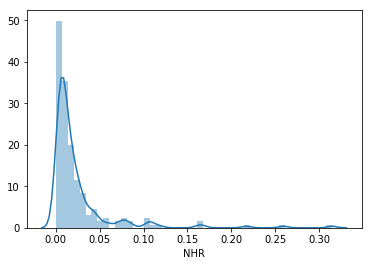

In [57]:
sns.distplot(df_park['NHR'])

#### Hence we can conclude few of the attributes have skewed data

### UNI-VARIATE & BI-VARIATE ANALYSIS

In [167]:
#Except for name all the columns are numeric
df_numeric=df_park.select_dtypes(include='number')
df_numeric=df_numeric.drop('status',axis=1)

In [147]:
#to get central_value
df_numeric.median()

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
dtype: float64

In [127]:
df_numeric.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### IQR

In [134]:
df_numeric.quantile(0.75) - df_numeric.quantile(0.25)

MDVP:Fo(Hz)         65.197000
MDVP:Fhi(Hz)        89.343000
MDVP:Flo(Hz)        55.727500
MDVP:Jitter(%)       0.003905
MDVP:Jitter(Abs)     0.000040
MDVP:RAP             0.002175
MDVP:PPQ             0.002095
Jitter:DDP           0.006520
MDVP:Shimmer         0.021380
MDVP:Shimmer(dB)     0.201500
Shimmer:APQ3         0.012020
Shimmer:APQ5         0.012800
MDVP:APQ             0.016320
Shimmer:DDA          0.036060
NHR                  0.019715
HNR                  5.877500
RPDE                 0.166256
DFA                  0.087124
spread1              1.403904
spread2              0.104883
D2                   0.537330
PPE                  0.115529
dtype: float64

#### To get the central spread, max,min we can use boxplot as visualization tool and also helps to find outliers

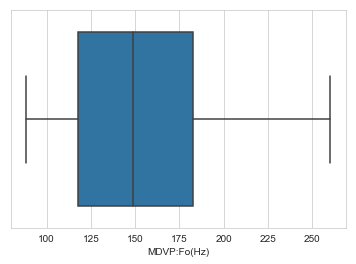

In [128]:
sns.set_style('whitegrid')
sns.boxplot(df_numeric['MDVP:Fo(Hz)'])

As concluded befor that the data for 'MDVP:Fo(Hz)' has a normal distribution and also we obseve no outlier are present

Text(0.5, 1.0, 'MDVP:RAP')

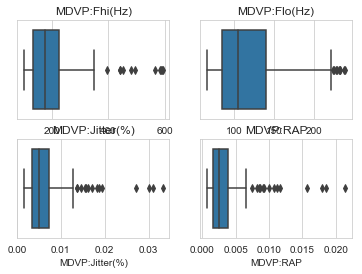

In [80]:
fig,ax=plt.subplots(2,2)
sns.boxplot(df_numeric['MDVP:Fhi(Hz)'],orient=90,ax=ax[0,0])
ax[0, 0].set_title('MDVP:Fhi(Hz)')
sns.boxplot(df_numeric['MDVP:Flo(Hz)'],orient=90,ax=ax[0,1])
ax[0, 1].set_title('MDVP:Flo(Hz)')
sns.boxplot(df_numeric['MDVP:Jitter(%)'],orient=90,ax=ax[1,0])
ax[1, 0].set_title('MDVP:Jitter(%)')
sns.boxplot(df_numeric['MDVP:RAP'],orient=90,ax=ax[1,1])
ax[1, 1].set_title('MDVP:RAP')

OBSERVATIONS:
1. OUTLIERS ARE PRESNT FOR EACH OF THESE ARRTIBUTES
2. ALSO NOTE THAT MDVP:Fhi(Hz) HAS RIGHT SKEWED DATA


#### Another way of getting to know outliers statiscally is through Zscore

In [169]:
#Except for name all the columns are numeric
df_numeric=df_park.select_dtypes(include='number')
##df_numeric=df_numeric.drop('status',axis=1)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

In [170]:
cols=df_numeric.columns
cols=cols.drop('status')

In [171]:
cols

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [172]:
for col in cols:
    col_zscore = col + '_zscore'
    df_numeric[col_zscore] = (df_numeric[col] - df_numeric[col].mean())/df_numeric[col].std(ddof=0)

In [173]:
df_numeric['MDVP:Fo(Hz)_zscore'].head()

0   -0.829300
1   -0.770972
2   -0.909476
3   -0.909622
4   -0.925657
Name: MDVP:Fo(Hz)_zscore, dtype: float64

In [182]:
#Check how may datpoint in each attributes are more than 3 std away from median value
df_numeric.iloc[:,23:][abs(df_numeric.iloc[:,23:]) > 3].notnull().sum()

MDVP:Fo(Hz)_zscore         0
MDVP:Fhi(Hz)_zscore        7
MDVP:Flo(Hz)_zscore        0
MDVP:Jitter(%)_zscore      4
MDVP:Jitter(Abs)_zscore    5
MDVP:RAP_zscore            4
MDVP:PPQ_zscore            4
Jitter:DDP_zscore          4
MDVP:Shimmer_zscore        4
MDVP:Shimmer(dB)_zscore    4
Shimmer:APQ3_zscore        3
Shimmer:APQ5_zscore        3
MDVP:APQ_zscore            3
Shimmer:DDA_zscore         3
NHR_zscore                 5
HNR_zscore                 1
RPDE_zscore                0
DFA_zscore                 0
spread1_zscore             0
spread2_zscore             0
D2_zscore                  1
PPE_zscore                 1
dtype: int64

Hence the following attributes have outliers:-

MDVP:Fhi(Hz)        
MDVP:RAP            
MDVP:PPQ            
Jitter:DDP          
MDVP:Shimmer        
MDVP:Shimmer(dB)    
Shimmer:APQ3        
Shimmer:APQ5        
MDVP:APQ            
Shimmer:DDA         
NHR                 
HNR                 
D2                  
PPE                 

In [136]:
#To get the different values present in a column we use value_counts
df_park['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

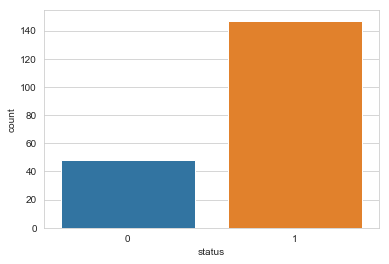

In [417]:
sns.countplot(df_park['status'])

So we conclude that among the given dataset there are 147 suffering from parkinson and 48 are healthy

### BIVARIANT ANALYSIS

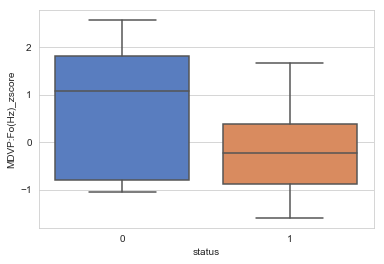

In [192]:
sns.boxplot(x='status', y='MDVP:Fo(Hz)_zscore', data=df_numeric, palette='muted')  # barplot

We can conclude that the for people suffering for parkinson have an average MDVP:Fo(Hz) lower that that of healthy

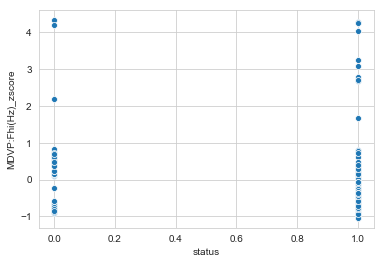

In [195]:
#Also scatterplot can be used for the same
sns.scatterplot(x='status', y='MDVP:Fhi(Hz)_zscore', data=df_numeric, palette='muted')

### MULTIVALTE ANALYSIS

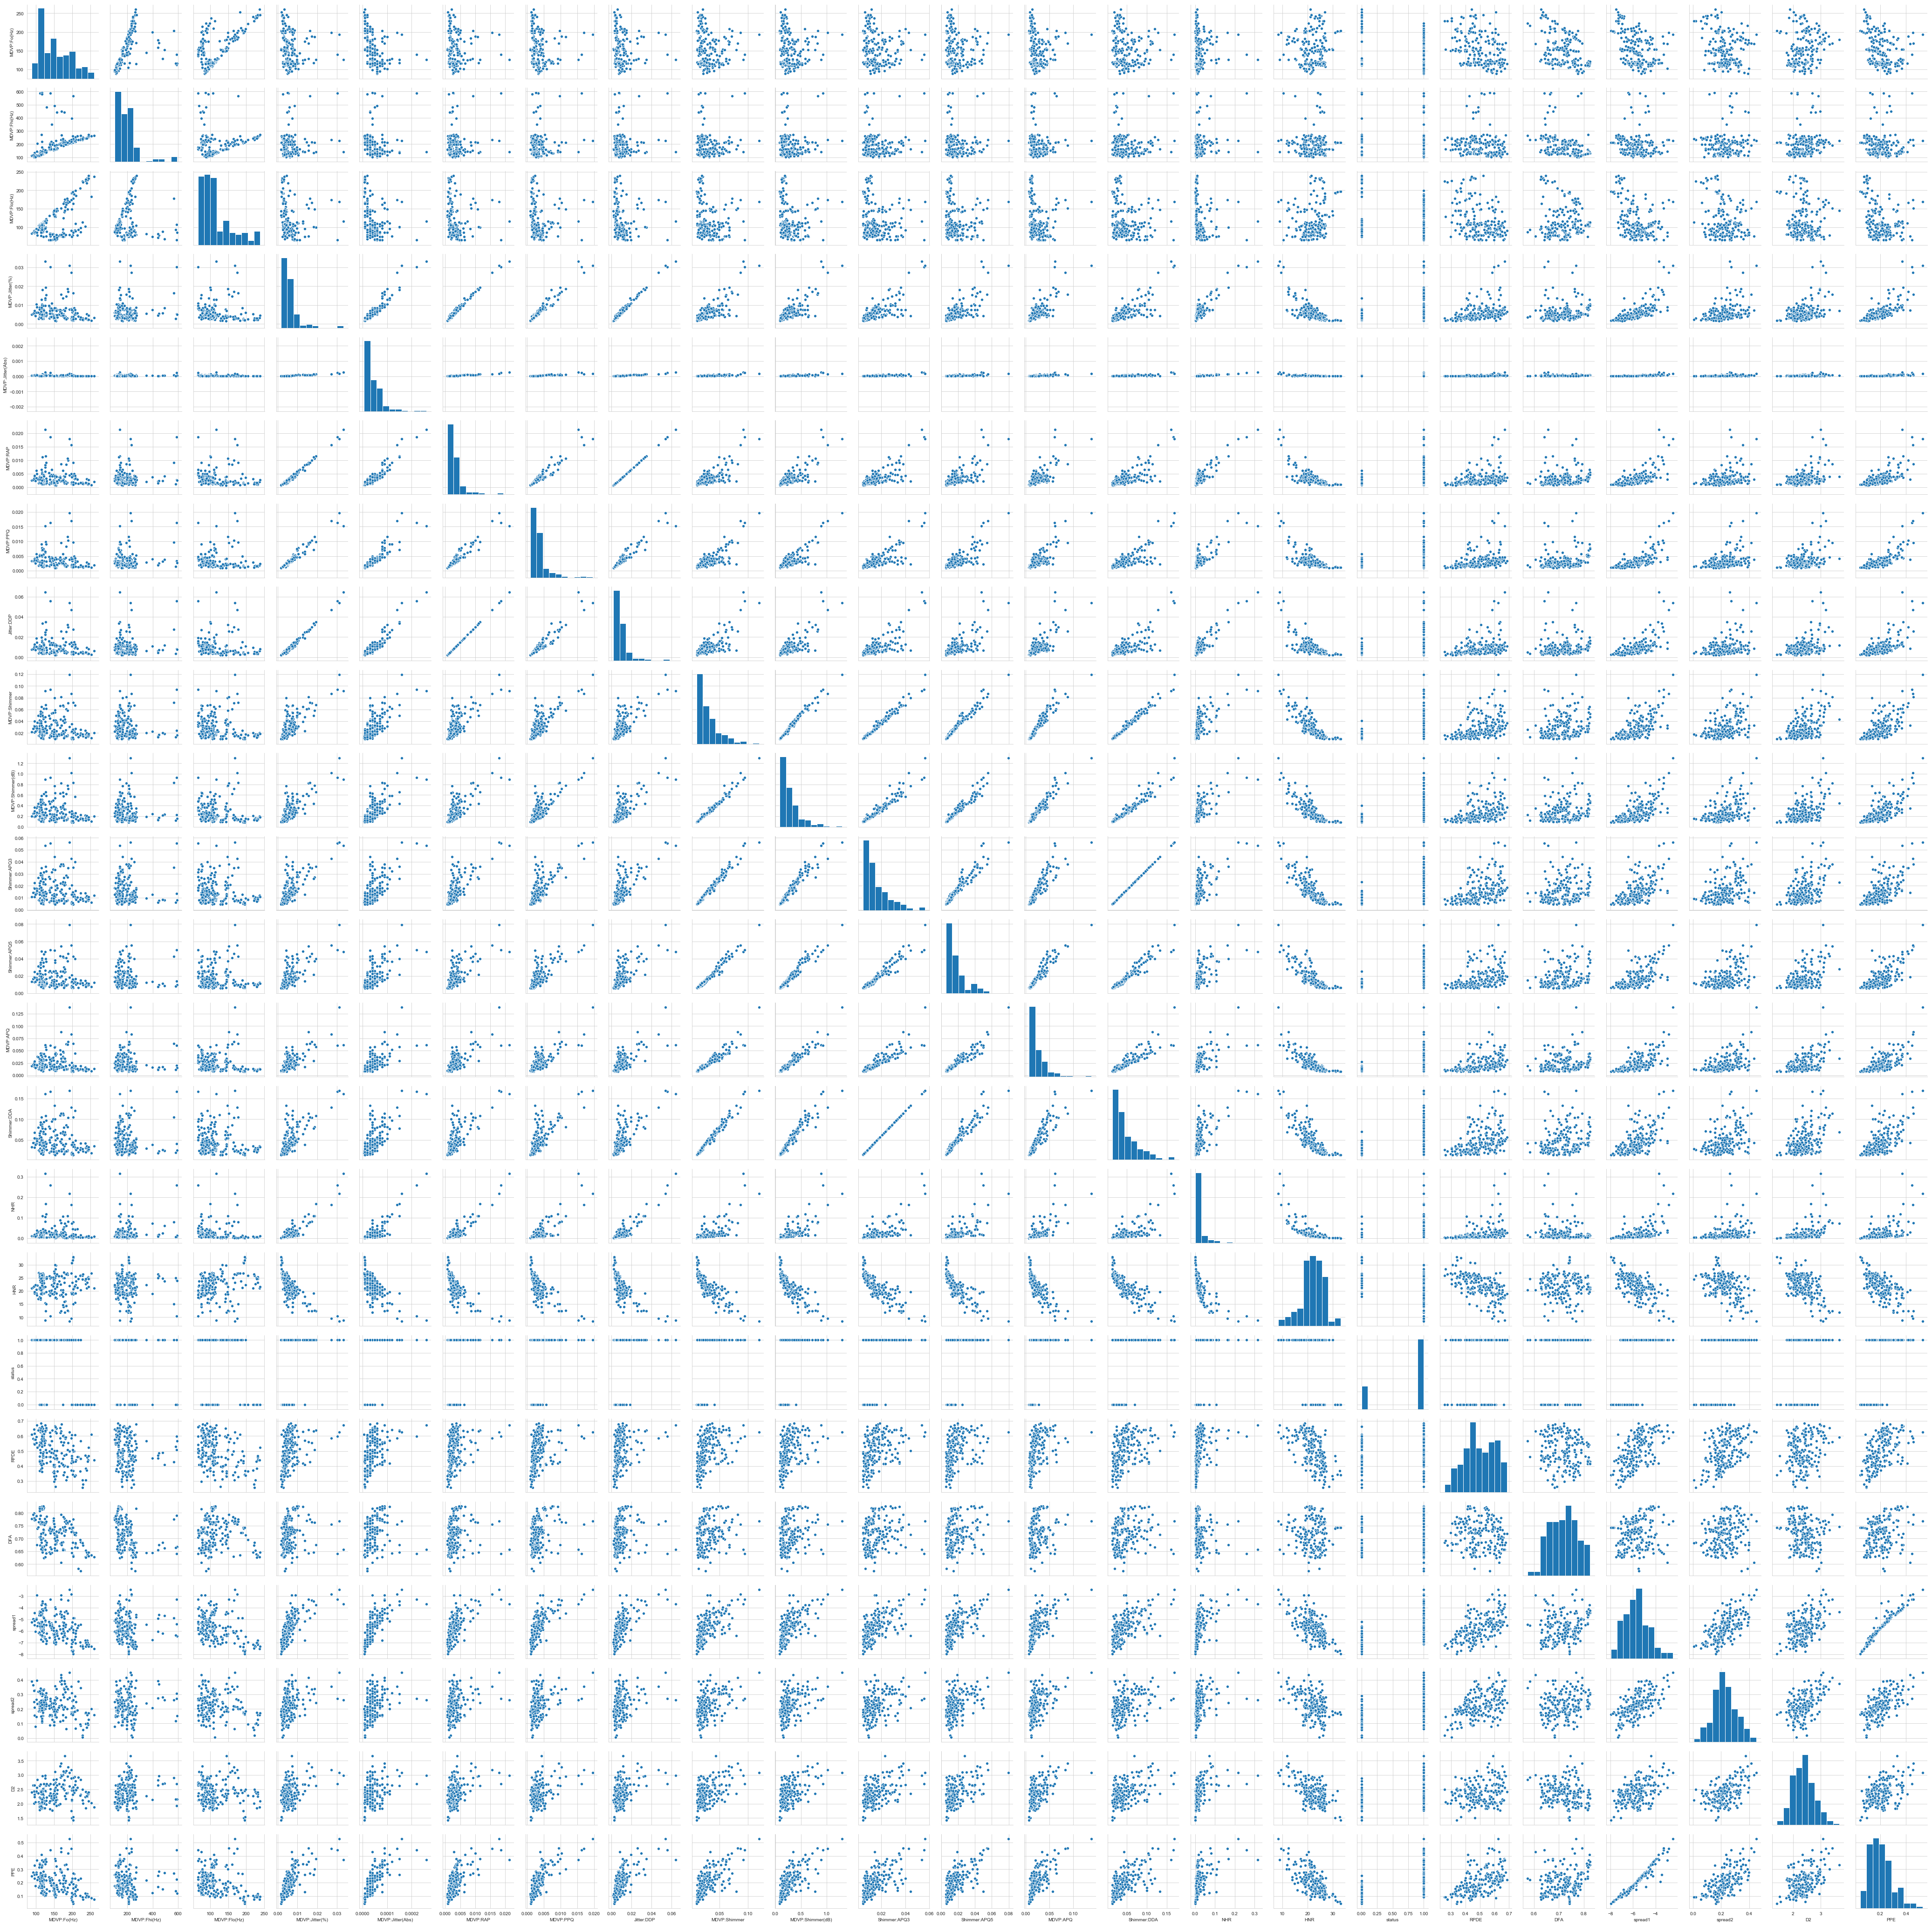

In [198]:
#To comapre all the attribute at one go we can we can use pairplots
sns.pairplot(df_park)

In [200]:
#to find out for any correlation between the attributes we can use corr()
df_park.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


**The same can be represented graphically using a the heatmap function in seaborn.**

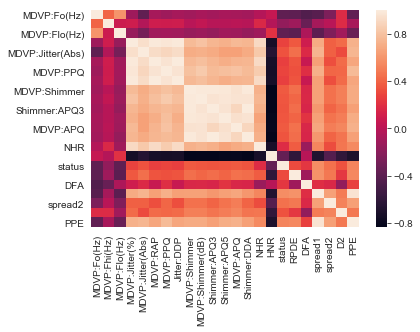

In [202]:
sns.heatmap(df_park.corr())  # plot the correlation coefficients as a heatmap

#### we can see many of the attributes of the dataset are highly correlated
**MDVP:Jitter(%)is highly related to  MDVP:RAP ,Jitter:DDP ,MDVP:PPQ

**MDVP:PPQ is highly related to  MDVP:RAP

**Shimmer:DDA to Jitter:DDP 

### SPLIT TEST AND TRAINING DATA

In [398]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Removing name and status from X
X =  df_park.drop(["status","name"],axis=1)
y =  df_park.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

### Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [399]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [400]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [401]:
dt_model.score(train_set , train_labels)      # performance on Train data

1.0

In [402]:
dt_model.score(test_set , test_labels)      # performance on test data

0.8983050847457628

As observed the model is an overfit model as accuracy is 1 for train data and dropped drastically for test data

### Predicted Values

In [403]:
y_predict=dt_model.predict(test_set)

In [404]:
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

### Compare between actual and predicted target variable

In [308]:
df_cross_tab=pd.DataFrame()
df_cross_tab['predict']=y_predict


In [309]:
df=test_labels.reset_index()
df=df.drop('index',axis=1)

In [310]:
df_cross_tab['actual']=df['status']

In [311]:
df_cross_tab

,predict,actual
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
5,0,1
6,1,1
7,1,1
8,0,0
9,1,1


In [406]:
cross_tab=pd.crosstab(test_labels,y_predict)
print(cross_tab)

col_0    0   1
status        
0       14   5
1        1  39


#### check for report stats

In [312]:
print(metrics.confusion_matrix(test_labels,y_predict))

[[14  5]
 [ 1 39]]


In [313]:
# summarize the fit of the model
print(metrics.classification_report(test_labels,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

   micro avg       0.90      0.90      0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



Here we are interested in 1 as it indicates the parkinson's ppl.We can see the precision for 1 is 0.89 and recall is less 0.97.It has a higher recall value suffering from parkinsonun its sensitivity is very high

In [263]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
MDVP:Fo(Hz)       0.166071
MDVP:Fhi(Hz)      0.165015
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.123814
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.092755
PPE               0.452346


As seen that mostly of the features are redundant ignoring those and recreating model

In [279]:
X=X.drop(['MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ'],axis=1)

In [280]:
#Dropping other parameters
X=X.drop(['NHR','HNR','RPDE','DFA','spread1','spread2'],axis=1)

In [281]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),Shimmer:DDA,D2,PPE
0,119.992,157.302,0.06545,2.301442,0.284654
1,122.400,148.650,0.09403,2.486855,0.368674
2,116.682,131.111,0.08270,2.342259,0.332634
3,116.676,137.871,0.08771,2.405554,0.368975
4,116.014,141.781,0.10470,2.332180,0.410335


### Regularization of tree

#### Min_SAMPLE_LEAF=2
#### MAX_DEPTH=3

In [ ]:
##Here  build with only imp features

In [282]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [318]:
dt_model_1= DecisionTreeClassifier(criterion = 'entropy' ,min_samples_leaf = 2, max_depth = 3, random_state = 100)
dt_model_1.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [319]:
dt_model_1.score(train_set , train_labels)      # performance on train data

0.9705882352941176

In [320]:
dt_model_1.score(test_set , test_labels)      # performance on test data

0.8983050847457628

Regularization helps the model from being overfit.

As seen the reguralization method has restricted the model from being a overfit and thus the accuracy has come down to 0.97.

But the accuracy of test data has not dropped.

#### MAX_SAMPLE_LEAF=5

#### MAX_DEPTH=4

In [321]:
dt_model_2= DecisionTreeClassifier(criterion = 'entropy' ,min_samples_leaf = 5, max_depth = 4, random_state = 100)
dt_model_2.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [315]:
dt_model_2.score(train_set , train_labels)      # performance on train data

0.9705882352941176

In [322]:
dt_model_2.score(test_set , test_labels)      # performance on test data

0.8983050847457628

CHANGING FURTHER THE 
MIN_SAMPLE_LEAF=2
MAX_DEPTH=2

In [324]:
dt_model_3= DecisionTreeClassifier(criterion = 'entropy' ,min_samples_leaf = 2, max_depth = 2, random_state = 100)
dt_model_3.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [325]:
dt_model_3.score(train_set , train_labels)      # performance on train data

0.8970588235294118

In [326]:
dt_model_3.score(test_set , test_labels)      # performance on test data

0.7966101694915254

With the max_depth and min_samples_leaf as 2 the accuracy goes down.

#### Implement the decision tree using Random Forest. 

In [343]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Removing name and status from X
X =  df_park.drop(["status","name"],axis=1)
y =  df_park.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [344]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier

sklearn.ensemble.forest.RandomForestClassifier

In [375]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 15,max_depth=3,min_samples_leaf=2,random_state=7)
rfcl = rfcl.fit(train_set, train_labels)

In [376]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.8135593220338984

In [387]:
print('n_estimator','score')
for i in range(10,51):
    rfcl = RandomForestClassifier(n_estimators = i,random_state=7)
    rfcl = rfcl.fit(train_set, train_labels)
    rfc1_score=rfcl.score(test_set , test_labels)
    print(i,'        ',rfc1_score)

n_estimator score
10          0.8813559322033898
11          0.8813559322033898
12          0.8983050847457628
13          0.864406779661017
14          0.8813559322033898
15          0.8813559322033898
16          0.8983050847457628
17          0.864406779661017
18          0.864406779661017
19          0.847457627118644
20          0.864406779661017
21          0.864406779661017
22          0.864406779661017
23          0.864406779661017
24          0.864406779661017
25          0.864406779661017
26          0.864406779661017
27          0.864406779661017
28          0.864406779661017
29          0.864406779661017
30          0.8813559322033898
31          0.864406779661017
32          0.864406779661017
33          0.864406779661017
34          0.8813559322033898
35          0.847457627118644
36          0.8813559322033898
37          0.847457627118644
38          0.8813559322033898
39          0.8813559322033898
40          0.8813559322033898
41          0.864406779661017
42        

In [388]:
print('n_estimator','score')
for i in range(50,101):
    rfcl = RandomForestClassifier(n_estimators = i,random_state=7)
    rfcl = rfcl.fit(train_set, train_labels)
    rfc1_score=rfcl.score(test_set , test_labels)
    print(i,'        ',rfc1_score)

n_estimator score
50          0.864406779661017
51          0.864406779661017
52          0.864406779661017
53          0.864406779661017
54          0.864406779661017
55          0.864406779661017
56          0.864406779661017
57          0.864406779661017
58          0.864406779661017
59          0.864406779661017
60          0.864406779661017
61          0.864406779661017
62          0.864406779661017
63          0.8813559322033898
64          0.8813559322033898
65          0.864406779661017
66          0.8813559322033898
67          0.8813559322033898
68          0.8813559322033898
69          0.8813559322033898
70          0.8813559322033898
71          0.8813559322033898
72          0.8813559322033898
73          0.8813559322033898
74          0.8813559322033898
75          0.864406779661017
76          0.8813559322033898
77          0.864406779661017
78          0.864406779661017
79          0.864406779661017
80          0.864406779661017
81          0.864406779661017
82        

In [389]:
#As seen the best no of estimators are 10-16 giving max accuracy of 89.831%

In [411]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 12,random_state=7)
rfcl = rfcl.fit(train_set, train_labels)

In [412]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.8983050847457628

In [413]:
print(metrics.confusion_matrix(test_labels,test_pred))

[[14  5]
 [ 1 39]]


In [414]:
# summarize the fit of the model
print(metrics.classification_report(test_labels,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

   micro avg       0.90      0.90      0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59

